In [1]:
import numpy as np
import sympy
x =sympy.Symbol('x') 
sympy.init_printing()

$$ \left[ \matrix{
5 & -4 & 0 & \vdots & 1 \\
-4 & 7 & -3 & \vdots & 0 \\
0 & -3 & 5 & \vdots & -2
}\right] $$

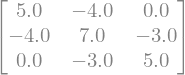

In [2]:
A = np.array( [[5.,-4,0],[-4,7,-3],[0,-3,5]] )
sympy.Matrix(A)

In [3]:
np.array( [[1],[0],[-2]] )

array([[ 1],
       [ 0],
       [-2]])

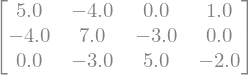

In [4]:
A_amp=np.hstack( (A,[[1],[0],[-2]]))
sympy.Matrix(A_amp)

## Definó las operaciones filas para llevar la matriz a su forma escalonada 

In [48]:
def mult_es(i,a,A):
    B = np.copy(A) 
    B[i] = a*B[i]    
    
    return B



def cam_fil(i,j,A):
    B = np.copy(A)
    B[[i,j]] = B[[j,i]]     
     
    return B


def mul_esc_fila( i, j, a, A ):
    B = np.copy(A)
    B[i] = B[i] - a*B[j]
    
    return B

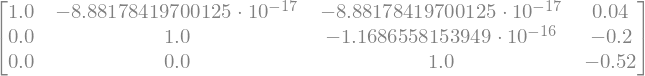

In [60]:
C = mul_esc_fila(1,0,A_amp[1][0]/A_amp[0][0],A_amp)
C = mul_esc_fila(2,1,C[2][1]/C[1][1],C)
C = mul_esc_fila(0,1,C[0][1]/C[1][1],C)
C = mult_es(2,1/C[2][2],C)
C = mul_esc_fila(1,2,C[1][2],C)
C = mul_esc_fila(0,2,C[0][2],C)
C = mult_es(0,1/C[0][0],C)
C = mult_es(1,1/C[1][1],C)
sympy.Matrix(C)

In [140]:
def eliminacion_gaussina(A):
    
    B = np.copy(A)# copio la matriz para operar 
    
    n = len(A)# define la longuitud de ka matriz 

    #barrido de las columna i-esima 
    for i in range( 0, n ):
        
        #se encuentra la primera entrada diferente de cero
        for j in range( i, n ):
            if B[i,j] != 0:
                #Normaliza el coeficiente 
                Norm = 1.0*B[i,j]
                break
                
        #ponemos el coeficiente diferente de cero en la i-esima fila 
        B = cam_fil( i, j, B )
        
        #Eliminando el coeficiente asociado a la i-ésima variable
        for j in range( i+1, n ):
            B = mul_esc_fila( j, i, -B[j,i]/Norm, B )
            
    #Normaliza la i-ésima variable
    B = mult_es( n-1, 1.0/B[n-1,n-1], B )
    
    #Encuentra la solucion
    A_sol = np.zeros( n )
    A_sol[n-1] = B[n-1,n]
    for i in range( n-1, -1, -1 ):
        A_sol[i] = ( B[i,n] - sum(B[i,i+1:n]*A_sol[i+1:n]) )/B[i,i]
    
    #Matriz diagonal superior y soluciones X
    return B, A_sol

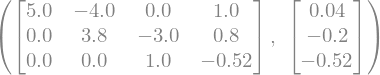

In [141]:
C = eliminacion_gaussina(A_amp)
M = sympy.Matrix(C[0])
s = sympy.Matrix(C[1])
M,s

In [142]:
print('La solucion de x_1 : {:.2f} '.format(s[0]))
print('La solucion de x_2 : {:.2f} '.format(s[1]))
print('La solucion de x_3 : {:.2f} '.format(s[2]))

La solucion de x_1 : 0.04 
La solucion de x_2 : -0.20 
La solucion de x_3 : -0.52 
